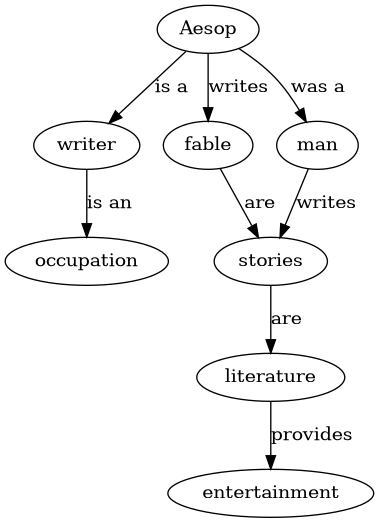

Is there a path from 'Aesop' to 'entertainment'? True


In [49]:
from graphviz import Digraph
from IPython.display import Image

entities = ['Aesop', 'fable', 'stories', 'writer', 'man', 'entertainment', 'occupation']
relationships = [
    ('Aesop', 'writes', 'fable'),
    ('fable', 'are', 'stories'),
    ('Aesop', 'is a', 'writer'),
    ('stories', 'are', 'literature'),
    ('literature', 'provides', 'entertainment'),
    ('writer', 'is an', 'occupation'),
    ('Aesop', 'was a', 'man'),
    ('man', 'writes', 'stories')
]
G = {
    "nodes": set(entities),
    "edges": []
}
for subj, verb, obj in relationships:
    G["edges"].append((subj, verb, obj))

def visualize_graph(graph):
    dot = Digraph(comment='Multigraph KB')
    for node in graph["nodes"]:
        dot.node(node)
    for subj, verb, obj in graph["edges"]:
        dot.edge(subj, obj, label=verb)
    dot.render('kb multipgraph', format='png', cleanup=True)
    return Image(filename='kb multipgraph' + '.png')

image = visualize_graph(G)
display(image)

def is_path_exists(graph, start, end, visited=None):
    if visited is None:
        visited = set()
    if start == end:
        return True
    visited.add(start)

    for subj, verb, obj in graph["edges"]:
        if subj == start and obj not in visited:
            if is_path_exists(graph, obj, end, visited):
                return True
    
    return False


start_node = "Aesop"
end_node = "entertainment"
print(f"Is there a path from '{start_node}' to '{end_node}'? {is_path_exists(G, start_node, end_node)}")


In [1]:
from graphviz import Digraph
from IPython.display import Image, display

entities = ["Jerry", "cat", "sofa", "Tom", "milk"]
relationships = [
    ("Jerry", "is a", "cat"),
    ("Jerry", "was sitting on", "sofa"),
    ("Jerry", "is owned by", "Tom"),
    ("Tom", "called", "Jerry"),
    ("Jerry", "walked from", "sofa"),
    ("Jerry", "walked to", "Tom"),
    ("Tom", "gave", "milk"),
    ("milk", "to", "Jerry"),
    ("Jerry", "drank", "milk")
]

G = {
    "nodes": set(entities),
    "edges": []
}

for subj, verb, obj in relationships:
    G["edges"].append((subj, verb, obj))

def visualize_graph(graph, filename):
    dot = Digraph(comment='Reified Entity Relationship Multigraph')
    for node in graph["nodes"]:
        dot.node(node)
    for subj, verb, obj in graph["edges"]:
        dot.edge(subj, obj, label=verb)

    dot.render(filename, format='png', cleanup=True)
    return Image(filename=filename + '.png')

pronoun_edges = [(subj, verb, obj) for subj, verb, obj in G["edges"] if verb in ["is a", "is owned by"]]
pronoun_graph = {
    "nodes": G["nodes"],
    "edges": pronoun_edges
}

verb_edges = [(subj, verb, obj) for subj, verb, obj in G["edges"] if verb not in ["is a", "is owned by"]]
verb_graph = {
    "nodes": G["nodes"],
    "edges": verb_edges
}

pronoun_image = visualize_graph(pronoun_graph, 'pronoun_entity_relationship_multigraph')
display(pronoun_image)
print("###############################################################################################")
print("")
verb_image = visualize_graph(verb_graph, 'verb_entity_relationship_multigraph')
display(verb_image)

def is_path_exists(graph, start, end, visited=None):
    if visited is None:
        visited = set()
    if start == end:
        return True
    visited.add(start)
    for subj, verb, obj in graph["edges"]:
        if subj == start and obj not in visited:
            if is_path_exists(graph, obj, end, visited):
                return True
    return False


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH